# Pymaceuticals Inc.
---

### Analysis

Based on the analysis performed, we can draw several conclusions regarding the potential treatments for SCC:

Capomulin and Ramicane appear to be the most effective drug regimens in reducing tumor volume, as they resulted in the smallest final tumor volumes compared to the other treatment regimens. This finding is supported by both the summary statistics table and the box plot visualization.

The number of timepoints for mice tested varied across different drug regimens, with Capomulin having the highest number of timepoints and Propriva having the lowest. This is visualized through both the Pandas bar plot and the Pyplot bar plot.

The distribution of male and female mice in the study was relatively equal, with slightly more male mice. This is shown in both the Pandas pie chart and the Pyplot pie chart.

There is a positive correlation between mouse weight and tumor volume for the Capomulin regimen, suggesting that heavier mice may have larger tumors. However, further statistical analysis would be needed to determine the significance of this correlation.

Overall, these findings can inform future research on potential treatments for SCC and guide the development of more effective anti-cancer medications.

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')
# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [51]:
# Checking the number of mice.
num_mice = df["Mouse ID"].nunique()

num_mice

249

In [52]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = df[df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_ids = duplicates["Mouse ID"].unique()
duplicate_ids

array(['g989'], dtype=object)

In [55]:
# Creating a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.drop(df[df['Mouse ID'] == 'g989'].index)
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [54]:
# Checking the number of mice in the clean DataFrame.
num_mice = clean_df["Mouse ID"].nunique()

num_mice

248

## Summary Statistics

In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# grouping the data by drug regimen and calculate the summary statistics
summary_stats = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# renaming the columns
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']

# displaying the summary statistics table
summary_stats


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

summary_table = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

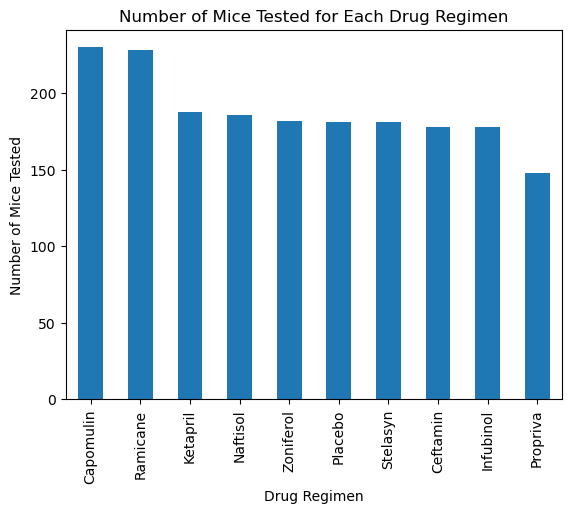

In [104]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
import matplotlib.pyplot as plt

# Group the data by drug regimen and count the number of mice for each group
mice_by_drug = clean_df.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending = False)

# Generate the bar plot
mice_by_drug.plot(kind='bar')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.title('Number of Mice Tested for Each Drug Regimen')
plt.show()


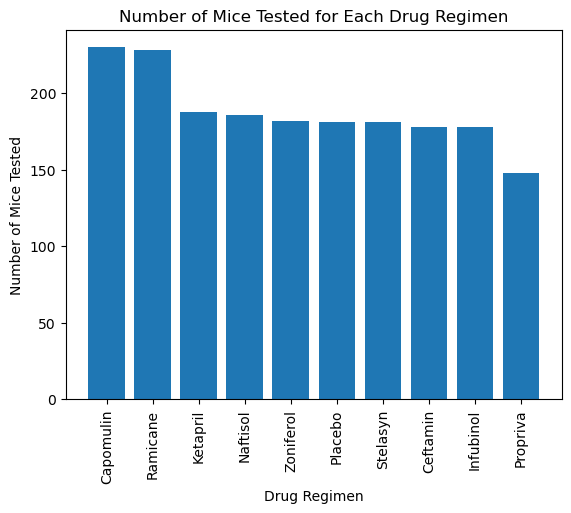

In [105]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot

# Group the data by drug regimen and count the number of mouse IDs for each group
mice_by_drug = clean_df.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending=False)

# Create a new figure and axis object
fig, ax = plt.subplots()

# Plot the bar plot using the axis object
ax.bar(mice_by_drug.index, mice_by_drug.values)

# Set the x-axis label, y-axis label, and plot title
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Number of Mice Tested')
ax.set_title('Number of Mice Tested for Each Drug Regimen')

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()


Text(0, 0.5, '')

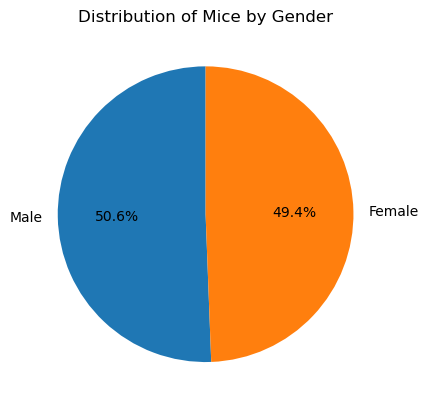

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Create a pie chart of gender distribution using Pandas
gender_distribution = df["Sex"].value_counts()

gender_distribution.plot(kind="pie", autopct="%1.1f%%", startangle=90)

# Add chart labels
plt.title("Distribution of Mice by Gender")
plt.ylabel("")

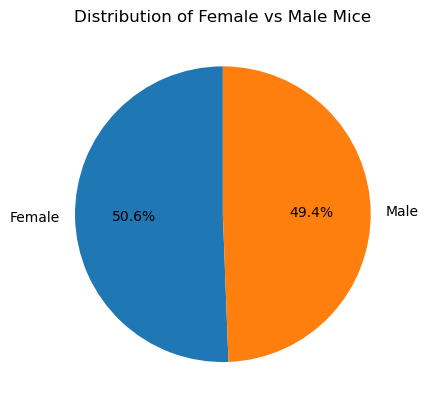

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Create a list of gender labels
gender_labels = ['Female', 'Male']

# Create the pie chart
plt.pie(gender_distribution, labels=gender_labels, autopct="%1.1f%%", startangle=90)

# Add a title to the chart
plt.title('Distribution of Female vs Male Mice')

# Display the chart
plt.show()

## Quartiles, Outliers and Boxplots

In [72]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# Step 1: Get the maximum timepoint for each mouse
max_timepoints = clean_df.groupby('Mouse ID')['Timepoint'].max()

# Step 2: Merge the `groupby` object with the original DataFrame to obtain the corresponding tumor volume at the last timepoint for each mouse
merged_df = pd.merge(clean_df, max_timepoints, on=['Mouse ID', 'Timepoint'])

# Step 3: Filter the merged DataFrame to keep only the four treatment regimens of interest
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_vol_df = merged_df.loc[merged_df['Drug Regimen'].isin(treatment_regimens), :]

# Step 4: Return the merged and filtered DataFrame
final_tumor_vol_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
7,u153,0,45.000000,0,Ceftamin,Female,11,25
8,b447,0,45.000000,0,Ceftamin,Male,2,30
10,x226,0,45.000000,0,Ceftamin,Male,23,28
11,t573,0,45.000000,0,Ceftamin,Female,15,27
20,c326,5,36.321346,0,Infubinol,Female,18,25


In [73]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
# Define the list of drugs
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to store the tumor volume data for each drug regimen
tumor_volumes = []

# Loop through each drug regimen
for drug in drugs:
    # Filter the data to only include the current drug regimen
    drug_data = final_tumor_vol_df[final_tumor_vol_df['Drug Regimen'] == drug]
    
    # Get the tumor volume data for the current drug regimen
    volumes = drug_data['Tumor Volume (mm3)']
    
    # Add the tumor volume data to the list
    tumor_volumes.append(volumes)
    
    # Calculate the IQR for the current drug regimen
    quartiles = volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine the lower and upper bounds for potential outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Identify any potential outliers for the current drug regimen
    outliers = volumes.loc[(volumes < lower_bound) | (volumes > upper_bound)]
    
    # Print the results for the current drug regimen
    print(f"{drug}:")
    print(f"    - Interquartile Range (IQR): {iqr:.2f}")
    print(f"    - Lower Bound: {lower_bound:.2f}")
    print(f"    - Upper Bound: {upper_bound:.2f}")
    if len(outliers) > 0:
        print("    - Potential Outliers:")
        for outlier in outliers:
            print(f"        {outlier:.2f}")
    else:
        print("    - No Potential Outliers")

    

Capomulin:
    - Interquartile Range (IQR): 7.78
    - Lower Bound: 20.70
    - Upper Bound: 51.83
    - No Potential Outliers
Ramicane:
    - Interquartile Range (IQR): 9.10
    - Lower Bound: 17.91
    - Upper Bound: 54.31
    - No Potential Outliers
Infubinol:
    - Interquartile Range (IQR): 11.48
    - Lower Bound: 36.83
    - Upper Bound: 82.74
    - Potential Outliers:
        36.32
Ceftamin:
    - Interquartile Range (IQR): 15.58
    - Lower Bound: 25.36
    - Upper Bound: 87.67
    - No Potential Outliers


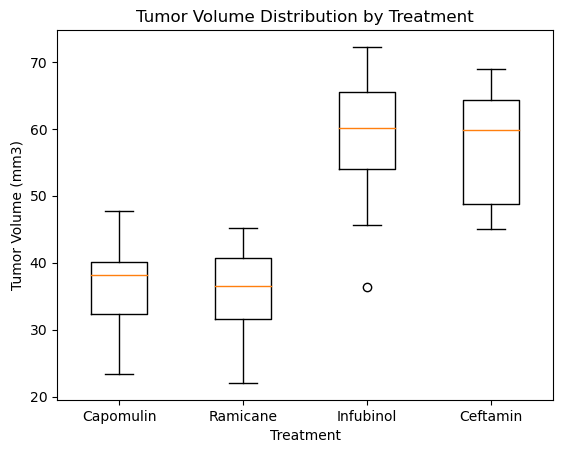

In [90]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data, labels=treatments)
ax.set_title('Tumor Volume Distribution by Treatment')
ax.set_xlabel('Treatment')
ax.set_ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

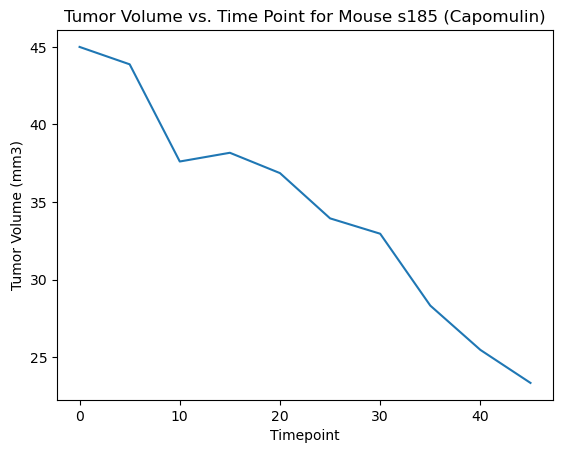

In [81]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Filter the data to only include mice that were treated with Capomulin
capomulin_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

# Choose a mouse ID from the filtered data
mouse_id = "s185"

# Filter the data to only include the chosen mouse ID
mouse_data = capomulin_data[capomulin_data["Mouse ID"] == mouse_id]

# Create a line plot using the filtered data
import matplotlib.pyplot as plt

plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)")
plt.show()



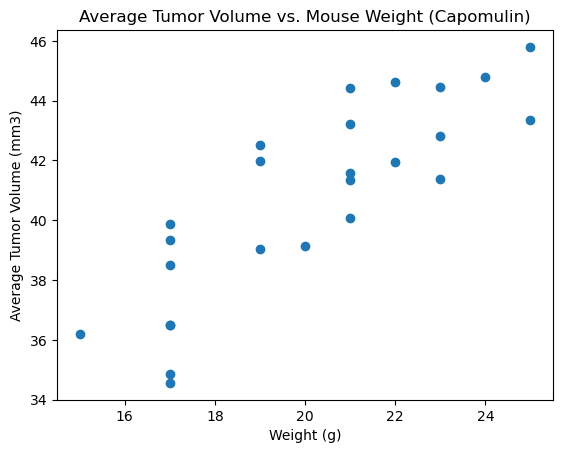

In [83]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Step 1: Create a new DataFrame with only Capomulin data
capomulin_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

# Step 2: Group the data by mouse ID and calculate mean tumor volume and weight
capomulin_grouped = capomulin_data.groupby("Mouse ID").mean()[["Weight (g)", "Tumor Volume (mm3)"]]

# Step 3: Create a scatter plot with mouse weight on the x-axis and average tumor volume on the y-axis
import matplotlib.pyplot as plt

x = capomulin_grouped["Weight (g)"]
y = capomulin_grouped["Tumor Volume (mm3)"]

plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight (Capomulin)")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


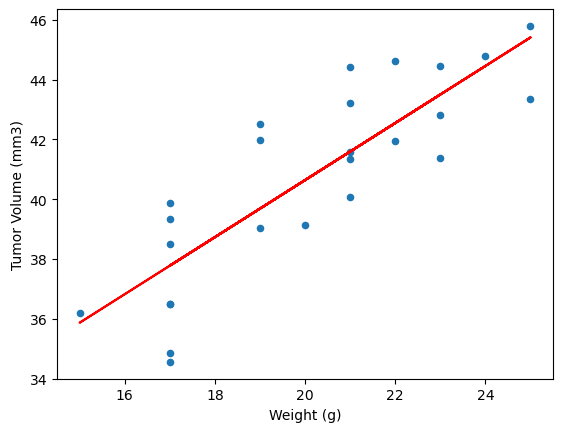

In [88]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Filter the Capomulin data
capomulin_data = clean_df[clean_df["Drug Regimen"] == "Capomulin"]

# Calculate the average tumor volume and mouse weight for each mouse
capomulin_avg = capomulin_data.groupby("Mouse ID").mean()[["Weight (g)", "Tumor Volume (mm3)"]]

# Create a scatter plot of average tumor volume vs. mouse weight
capomulin_avg.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")

# Calculate the correlation coefficient and linear regression model
from scipy.stats import pearsonr, linregress

r, p = pearsonr(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])

slope, intercept, rvalue, pvalue, stderr = linregress(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])

# Add the regression line to the scatter plot
import matplotlib.pyplot as plt

x = capomulin_avg["Weight (g)"]
y = capomulin_avg["Tumor Volume (mm3)"]
plt.plot(x, slope*x + intercept, color="red")
print('The correlation between mouse weight and the average tumor volume is',round(r, 2))
plt.show()